

# Project: Investigate a Dataset - [No-show Appointments Analysis ]


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction

### Dataset Description 



This dataset is a collection of information from over one hundred thousand medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment and why they miss their appointments. A number of characteristics about the patient are
included in each row.

PatientID - The unique identity of the patient

AppointmentID - The unique identity of appointment sheduled.

Gender - The gender of the patients the dataset spans from 0-100 years of age. 

ScheduledDay - Tells us on what day the patient set up their appointment.

Neighborhood - indicates the location of the hospital.

Scholarship - indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

Diabetes - This indicates if the patient is diabetic or not, the dataset contains more of non-diabetic patients(0) and less of diabetic patients (1).

Alchoholism - This indicates if the patient is an Alchoholic or not, the dataset contains more of non-alcholic patients(0) and less of alchoholic patients (1).

Hypertension - This indicates if the patient is Hypertensive or not, the dataset contains more of non-hypertensive patients(0) and less of hypertensive patients (1).

The dataset contains no null values and no duplicated rows.


### Question(s) for Analysis

**Research Question 1 (what is the most Sinificant Atribute that Affects patients show up)**

**Research Question 2 (how some of the fairly correlated attributes Affect Patient show-up)**

**Research Question 3 (what is the significance of wait time on the patients showing up or not showing up.)**

**Research Question 4 (what is the location of the most visited hospitals)**

In [7]:
# Use this cell to set up import statements for all of the packages that you
#   importing the packeges I plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#% matplotlib inline
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [8]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties


In [9]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('no_show_appointments.csv')
df.head(5)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning


In [12]:
df.shape

(110527, 14)

In [13]:
df.duplicated().count()

110527

In [14]:
df.isnull().count()

PatientId         110527
AppointmentID     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighbourhood     110527
Scholarship       110527
Hipertension      110527
Diabetes          110527
Alcoholism        110527
Handcap           110527
SMS_received      110527
No-show           110527
dtype: int64

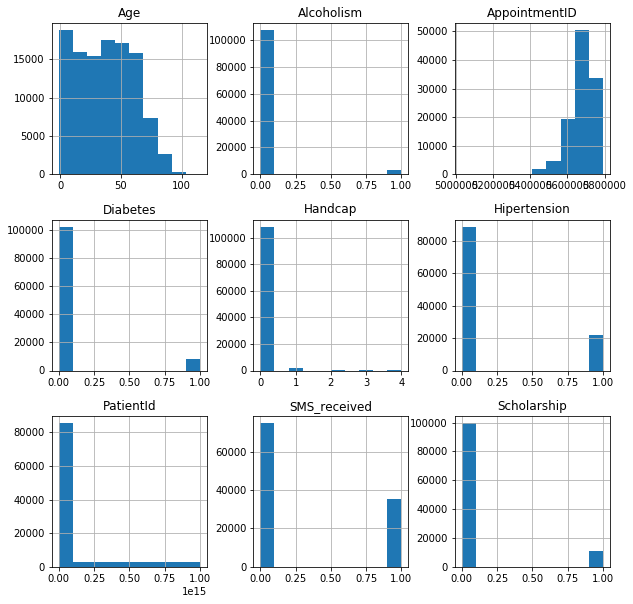

In [15]:
df.hist(figsize=(10,10));

In [16]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [17]:
df.PatientId.duplicated().value_counts()

False    62299
True     48228
Name: PatientId, dtype: int64

# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


After checking thstructure of the dataet i discovered it contains no null values, no duplicates. which is quite good.
but i discovered the age column of the dataset contains negative rows.

In [18]:
neg_age = df[df['Age'] == -1]
neg_age


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


**we will leave it as its just one row which makes it insignificant**

**we will now change the data type for Sheduled Day and Appointment Day to datetime as it is currently an object data type which should not be so as it makes analysis harder**

In [20]:

df.rename(columns=lambda x: x.lower().replace('-','_'),inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
#df['appointmentday'] = df['appointmentday'].dt.date
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
#df['scheduledday'] = df['scheduledday'].dt.date
df['wait_time']=(df['appointmentday'].dt.date -df['scheduledday'].dt.date).dt.days
df['wait_time'] = df['wait_time'].astype(int)
df.info()

KeyError: 'appointmentday'

**we also change the column Names to regularize the column Names**

**we create a new column for No-show called NShow to aid our analysis**

In [21]:
df['nshow'] = df['no_show'].map({'Yes': True, 'No': False})
df.tail()


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,nshow
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,False
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,False
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,False
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,False
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No,False


In [22]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,nshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,False
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,False
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,False
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,False
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,False


**this shows the amount of people who showed up for their appointments against those who didnt show up**

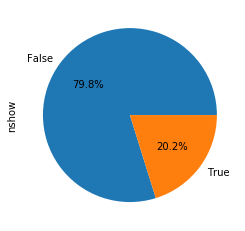

In [23]:
df['nshow'].nunique()
df_showed =(df['nshow']).value_counts()
df_showed.plot(kind='pie', autopct= '%.1f%%')


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (what is the most Sinificant Atribute that Affects patients show up)

In [24]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,nshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,False
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,False
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,False
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,False
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,False


**Checking to see the corelation between the atrributes, to determine the most correlated**

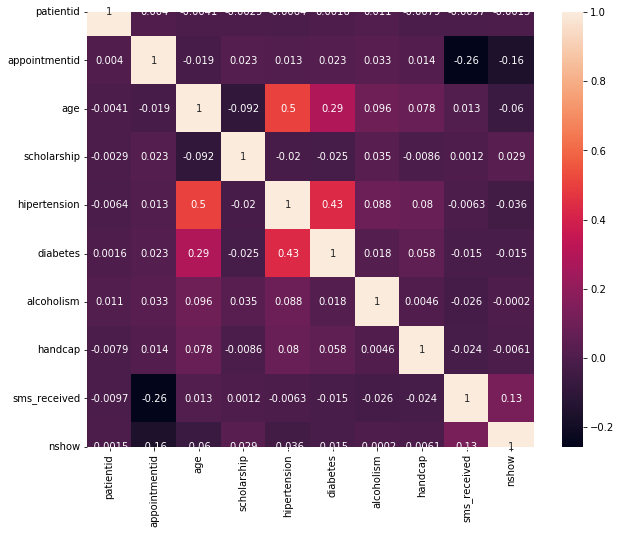

In [25]:
f,ax=plt.subplots(figsize=(10,8))
df_corr= df.corr()
sns.heatmap(df_corr,annot=True)
#df.corr()

From the heat map we can see that no values have very strong correlation with another however, there are a few fairly correlated attributes.

In [26]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


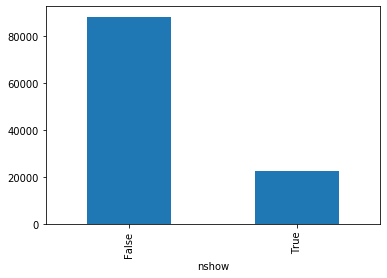

In [27]:
dhshow = df.groupby('nshow')['age'].count()
dhshow.plot(kind ='bar')

###### We now check to see how some of the fairly correlated attributes Affect Patient show-up

In [60]:
def plot_graph(x1, x2, x3,column_label, graph_title, graph_x_label):
    ax = plt.subplots(figsize= (10, 8))
    plt.subplot(x1,x2,x3)
    sns.countplot(df[column_label],data=df,hue='no_show')
    plt.title(graph_title)
    plt.xlabel(graph_x_label)
    plt.legend(title='show',labels=['Showed-up','No-show'])
    plt.show

C:\Users\Habib\Miniconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Habib\Miniconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Habib\Miniconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

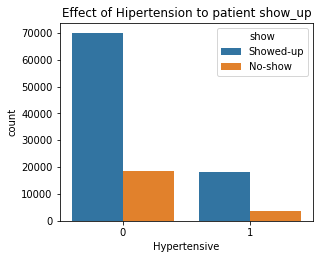

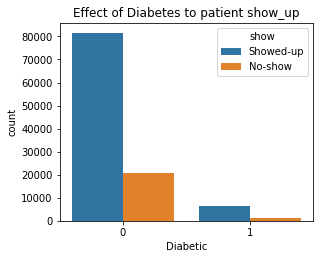

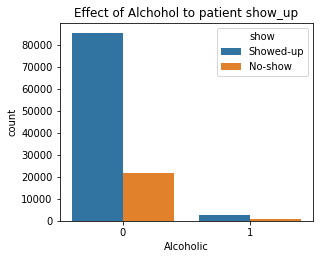

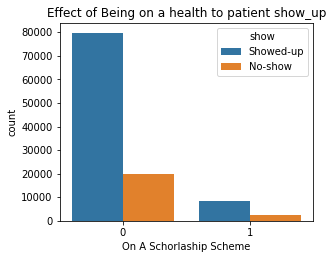

In [63]:
plot_graph(2,2,1,"hipertension", "Effect of Hipertension to patient show_up", "Hypertensive")
plot_graph(2,2,2,"diabetes", "Effect of Diabetes to patient show_up", "Diabetic")
plot_graph(2,2,3,"alcoholism", "Effect of Alchohol to patient show_up", "Alcoholic")
plot_graph(2,2,3,"scholarship", "Effect of Being on a health to patient show_up", "On A Schorlaship Scheme")

from this series of subplots we can see that

1) Most hypertensive patients showed up for their appoinments as compared to the ratio on non hypertensive patients that did not show p for their appointment.

2) Almost all diabetic patient showed up for their appoinments as compared to large gap noticed in the non diabetic patients, where a large number of them do not show up for their appointment.

3) Almost all Alcoholic patients show up for their appoinments while most non Alcoholic patients do not show up for their appointment,

4) This shows that almost every one who is on a sholarship sheme showed up for their appoinments, and there are more people who are not on ths schorlaship scheme and most of them still made for their appoinments.

In [ ]:
sns.scatterplot(x='wait_time',  y='no_show',data=df, hue ='no_show')
plt.show()

**From this scatter plot we can say that the wait time does not have any strong significance on the patients showing up or not showing up.**

In [ ]:
N_df = df.neighbourhood.value_counts()
f,ax=plt.subplots(figsize=(20,8))
ax.bar(N_df.index,N_df.values)
plt.xticks(rotation=90)
plt.title('THE MOST USED HOSPITALS')
plt.show()

From the bar chat we can say that, the most visited hospitals are those in JARDIM CAMBURI while some about Four hospitals are not visited at all.

<a id='conclusions'></a>
## Conclusions


I found out that the No Show appointment dataset is a very intuitive data set with no null values. 

it provides different attributes which could lead to patients missing their appointments.

i asked a quuestion to see which of the values gives more insight on the no show of patients on their Appoinment day. 

i also checked to see the significance of wait time to patients not showing up, it turned out wait time had no significance to this.

i also checkedfor the location of the most visited hospitals.

## Limitations

Although was clean The age column contained a negative value, however it was just one so i left it as it is significant to our analysis.

The date colums were also not in the write datatype format so i had to convert them.

The column Names was inconsistent which i had to fix.



In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295